<a href="https://colab.research.google.com/github/Imokut/my-tensorflow-learning/blob/main/using_image_generator(binary_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# to download the horve vs human zip file
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-11-08 03:46:50--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  23.7MB/s    in 6.5s    

2022-11-08 03:46:57 (22.1 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
#to unzip the file
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [4]:
import os

#directory with train horse
train_horse_dir = os.path.join('./horse-or-human/horses')

#directory with train human
train_human_dir = os.path.join('./horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names)

train_human_names = os.listdir(train_human_dir)
print(train_human_names)

['horse27-5.png', 'horse08-5.png', 'horse02-8.png', 'horse43-3.png', 'horse05-4.png', 'horse42-9.png', 'horse07-4.png', 'horse10-9.png', 'horse29-3.png', 'horse42-6.png', 'horse41-7.png', 'horse38-5.png', 'horse10-5.png', 'horse42-0.png', 'horse22-2.png', 'horse05-5.png', 'horse38-4.png', 'horse45-9.png', 'horse40-6.png', 'horse36-6.png', 'horse29-9.png', 'horse14-6.png', 'horse28-6.png', 'horse16-8.png', 'horse36-9.png', 'horse21-7.png', 'horse17-7.png', 'horse45-4.png', 'horse15-6.png', 'horse23-5.png', 'horse47-3.png', 'horse44-1.png', 'horse26-8.png', 'horse49-6.png', 'horse34-6.png', 'horse21-3.png', 'horse03-7.png', 'horse31-8.png', 'horse44-5.png', 'horse04-3.png', 'horse07-0.png', 'horse14-7.png', 'horse14-4.png', 'horse17-5.png', 'horse25-6.png', 'horse47-1.png', 'horse49-3.png', 'horse13-2.png', 'horse10-3.png', 'horse28-8.png', 'horse26-1.png', 'horse22-6.png', 'horse35-7.png', 'horse33-9.png', 'horse30-4.png', 'horse15-4.png', 'horse24-9.png', 'horse25-3.png', 'horse20-1.pn

In [6]:
print("horse amount :{}, human no.:{}".format(len(train_horse_names), len(train_human_names)))

horse amount :500, human no.:527


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

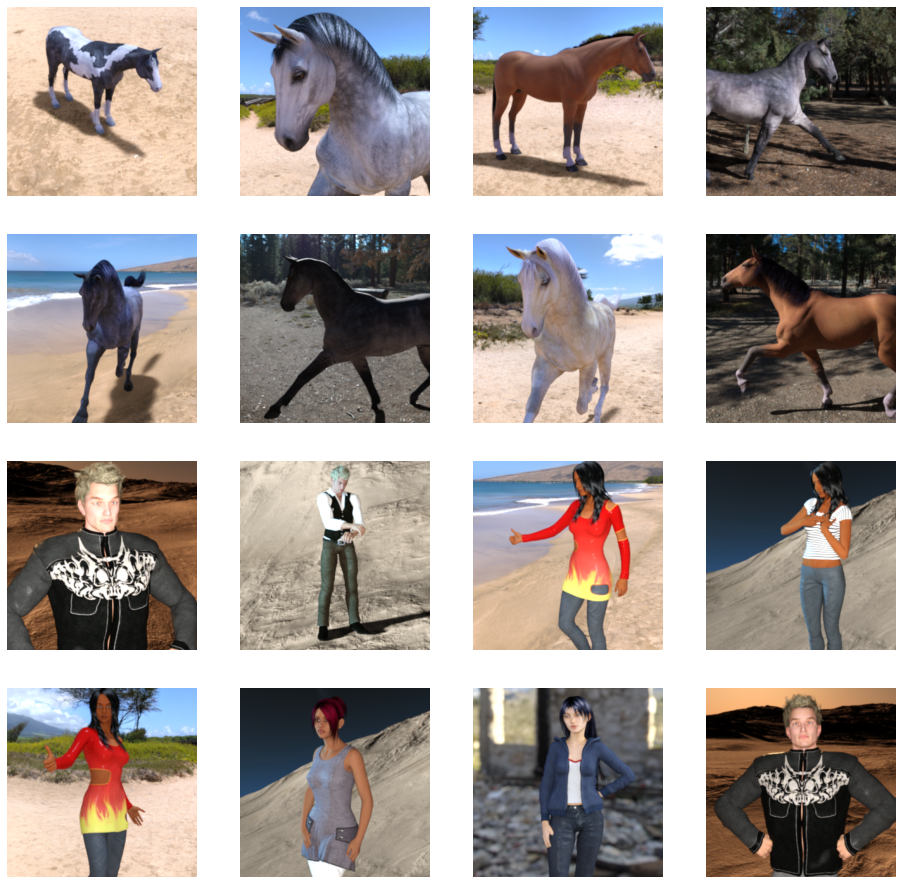

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf


In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/', 
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)


Found 1027 images belonging to 2 classes.


In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [14]:
stopLoss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

adding validation dataset

In [15]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-11-08 03:47:06--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  6.90MB/s    in 1.6s    

2022-11-08 03:47:08 (6.90 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [16]:
# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [17]:
# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [18]:
validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

VAL SET HORSES: ['horse4-468.png', 'horse5-018.png', 'horse3-498.png', 'horse5-402.png', 'horse1-510.png', 'horse5-550.png', 'horse6-544.png', 'horse1-122.png', 'horse3-584.png', 'horse2-011.png']
VAL SET HUMANS: ['valhuman03-21.png', 'valhuman01-01.png', 'valhuman01-14.png', 'valhuman04-22.png', 'valhuman05-16.png', 'valhuman04-17.png', 'valhuman04-20.png', 'valhuman01-16.png', 'valhuman05-05.png', 'valhuman04-00.png']


In [19]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')


total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [20]:
validation_datagen = ImageDataGenerator(rescale=1/255)

In [21]:
# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [22]:
import tensorflow as tf


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 19s 896ms/step - loss: 0.7853 - accuracy: 0.5495 - val_loss: 0.6207 - val_accuracy: 0.8516
Epoch 2/15
8/8 [==============================] - 7s 903ms/step - loss: 0.6781 - accuracy: 0.6707 - val_loss: 0.4452 - val_accuracy: 0.8359
Epoch 3/15
8/8 [==============================] - 7s 910ms/step - loss: 0.4941 - accuracy: 0.7964 - val_loss: 0.5415 - val_accuracy: 0.7578
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.3713 - accuracy: 0.8711 - val_loss: 1.1867 - val_accuracy: 0.8086
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.1905 - accuracy: 0.9266 - val_loss: 1.3829 - val_accuracy: 0.7539
Epoch 6/15
8/8 [==============================] - 7s 917ms/step - loss: 0.1768 - accuracy: 0.9244 - val_loss: 1.1786 - val_accuracy: 0.8555
Epoch 7/15
8/8 [==============================] - 7s 907ms/step - loss: 0.2659 - accuracy: 0.8810 - val_loss: 1.6998 - val_accuracy: 0.7617
Epoch 8/15
8/8 [=========

In [24]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving download.jfif to download.jfif
Saving images (2).jfif to images (2).jfif
1/1 [==============================] - 0s 261ms/step
[1.5857013e-08]
download.jfif is a horse
1/1 [==============================] - 0s 17ms/step
[0.23797205]
images (2).jfif is a horse


1/1 [==============================] - 0s 88ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


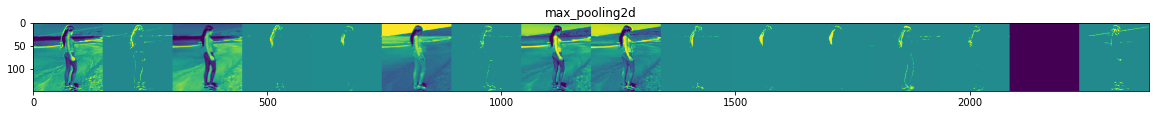

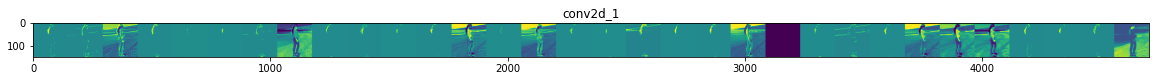

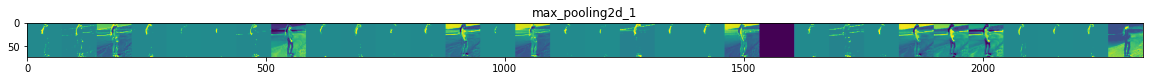

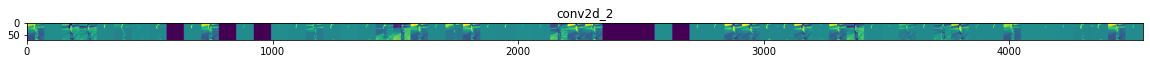

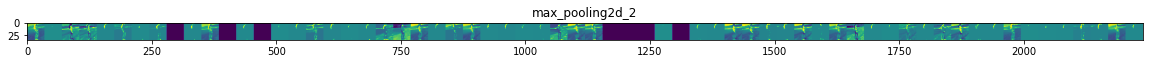

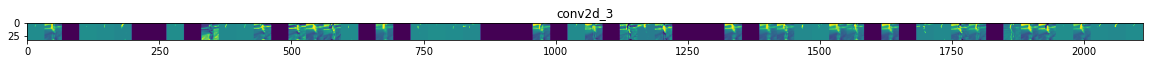

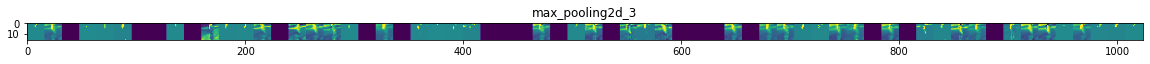

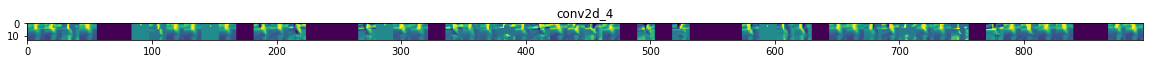

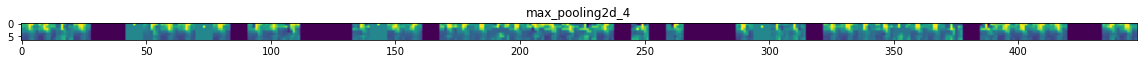

In [25]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)